<a href="https://colab.research.google.com/github/guidomoor/FEA-ML/blob/main/U_RF_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RF Prediction from U**

the dataframe is extracted from single element simulations where one node is being displaced (u1,u2). The element is a 2D plain strain element fully integrated:

4--------3

1--------2

U is a 8x8 array = [u11, u12, u21, u22, ..., u44]
RF is a 8x8 array = [RF11, RF12, ..., RF44]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
 #Create a model that inherits nn.Module
 class Model(nn.Module):
  #Input Layer (4 features of flower) -->
  #Hidden Layer 1 (#of neurons) -->
  #H2 --> Output
  #(3 classes of flowers)
  def __init__(self, in_features=8, h1=16, h2=32, h3=16, out_features=8):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  #this function is pushing the information forward through the layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectify linear unit function relu
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

In [ ]:
torch.manual_seed(42)
model = Model()

In [ ]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')
    my_df = pd.read_csv(filename, header=None)  # Read the CSV file into a DataFrame


Saving my_df.csv to my_df.csv
Uploaded file: my_df.csv


In [ ]:
my_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,6459.5,-3320.9,2194.3,-5332.9,6459.5,-3320.9,2194.3,-5332.9
1,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,6459.5,-3320.9,2194.3,-5332.9,6459.5,-3320.9,2194.3,-5332.9
2,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,6459.5,-3320.9,2194.3,-5332.9,6459.5,-3320.9,2194.3,-5332.9
3,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,0.1,3.320900e-33,-2.194300e-33,5.332900e-33,6459.5,-3320.9,2194.3,-5332.9,6459.5,-3320.9,2194.3,-5332.9


In [ ]:
#Train Test Slip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Convert your datasets to PyTorch tensors
X_train = torch.FloatTensor(X_train)  # Inputs should be Float
X_test = torch.FloatTensor(X_test)    # Inputs should be Float

# If y_train and y_test are initially NumPy arrays
y_train = np.array(y_train, dtype=float)  # Ensure they are float arrays
y_test = np.array(y_test, dtype=float)    # Ensure they are float arrays

# Convert to PyTorch FloatTensor
y_train = torch.FloatTensor(y_train)  # Convert to FloatTensor
y_test = torch.FloatTensor(y_test)    # Convert to FloatTensor



In [ ]:
#Set the criterion of model to measure the error
criterion = nn.MSELoss()  # Use MSE loss for regression
#Choose an Optimizer - Adam Optimizer, learning rate (lr).
#learning rate is used in case the error does not go down
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Train the model:
#Epochs: (one run through all the training data in the network)
epochs = 1000
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train)

  #Measure the loss/error
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep Track of losses
  losses.append(loss.detach().numpy())

  #Print the losses
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  #Do back propagation: take error of forward propagation and feed it backwords to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 21502474.0
Epoch: 10 Loss: 21498178.0
Epoch: 20 Loss: 21476568.0
Epoch: 30 Loss: 21385378.0
Epoch: 40 Loss: 21094568.0
Epoch: 50 Loss: 20343812.0
Epoch: 60 Loss: 18713522.0
Epoch: 70 Loss: 15702248.0
Epoch: 80 Loss: 11078009.0
Epoch: 90 Loss: 5685926.0
Epoch: 100 Loss: 1927303.5
Epoch: 110 Loss: 811241.1875
Epoch: 120 Loss: 287003.71875
Epoch: 130 Loss: 31094.318359375
Epoch: 140 Loss: 16261.8193359375
Epoch: 150 Loss: 7759.12744140625
Epoch: 160 Loss: 4145.0263671875
Epoch: 170 Loss: 1229.5675048828125
Epoch: 180 Loss: 126.07926177978516
Epoch: 190 Loss: 92.96697235107422
Epoch: 200 Loss: 43.41799545288086
Epoch: 210 Loss: 25.738325119018555
Epoch: 220 Loss: 4.092360019683838
Epoch: 230 Loss: 1.405575156211853
Epoch: 240 Loss: 0.4109645187854767
Epoch: 250 Loss: 0.340513676404953
Epoch: 260 Loss: 0.07839033007621765
Epoch: 270 Loss: 0.026262246072292328
Epoch: 280 Loss: 0.006054416298866272
Epoch: 290 Loss: 0.005080394446849823
Epoch: 300 Loss: 0.0011192932724952698
Epo

Text(0.5, 0, 'Epoch')

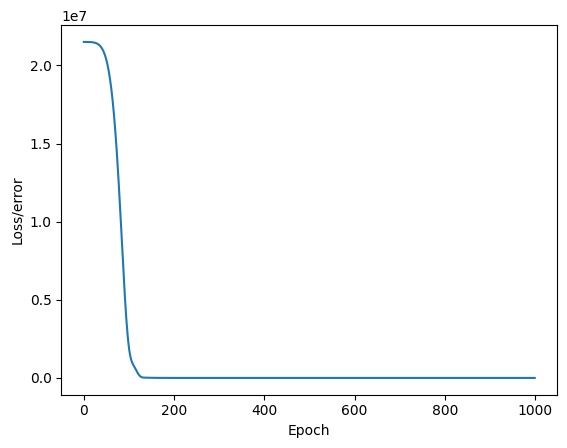

In [ ]:
#Plot Loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Evaluate Model on Test Data Set
with torch.no_grad(): #turns off backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

loss

tensor(4.0233e-07)

In [ ]:
# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Get predictions
    y_preds = model(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = torch.mean(torch.abs(y_preds - y_test))
    print(f'MAE: {mae.item():.4f}')

    # Calculate Mean Squared Error (MSE)
    mse = torch.mean((y_preds - y_test) ** 2)
    print(f'MSE: {mse.item():.4f}')

    # Calculate R-squared
    ss_total = torch.sum((y_test - torch.mean(y_test)) ** 2)
    ss_residual = torch.sum((y_test - y_preds) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f'R-squared: {r_squared.item():.4f}')


MAE: 0.0005
MSE: 0.0000
R-squared: 1.0000


In [ ]:
#new random input
new_test = torch.tensor([[0.100000000000000,	3.32094820000000e-33,	-2.19433500000000e-33,	5.33289800000000e-33,	0.100000000000000,	3.32094820000000e-33,	-2.19433500000000e-33,	5.33289800000000e-33]])
#Feed into the NN, like the X_test
with torch.no_grad():
  print(model(new_test))

tensor([[ 6459.5000, -3320.9004,  2194.3000, -5332.9009,  6459.4990, -3320.9001,
          2194.3003, -5332.8989]])


In [ ]:
# Assuming my_df has 16 columns
X = my_df.iloc[:, :8]  # Select the first 8 columns (U): input
y = my_df.iloc[:, 8:]   # Select the last 8 columns (RF): output
#convert to numpy arrays
#Data used in the NN
X = X.values
y = y.values